In [3]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] =10,8

In [4]:
dataset = pd.read_csv("ASSAULT_TOTAL.csv")
# dataset['Year'] = pd.to_datetime(dataset['Year'], infer_datetime_format= True)
indexedDataset = dataset.set_index(['Year'])

In [5]:
from datetime import datetime
indexedDataset

,Assault on women with intent to outrage her modesty
Year,
2001,34124
2002,33943
2003,32939
2004,34567
2005,34175
2006,36617
2007,38734
2008,40413
2009,38711


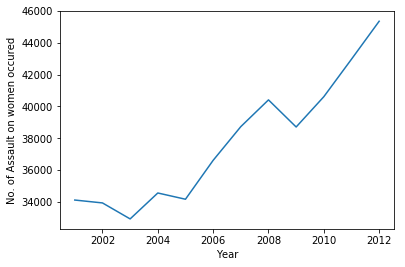

In [6]:
plt.xlabel("Year")
plt.ylabel("No. of Assault on women occured")
plt.plot(indexedDataset)

In [7]:
#as we can see the data is not stationary, theres an upward trend..it keeps on fluctuating
#there are 2 diff ways by which you can check the stationarity of the data. 1-by rolling mean and rolling std and 2-by dickey-fuller test 
rolmean = indexedDataset.rolling(window=2).mean() #for determining the rolling mean and standard deviation
rolstd = indexedDataset.rolling(window=2).std()
print(rolmean, rolstd)

      Assault on women with intent to outrage her modesty
Year                                                     
2001                                                NaN  
2002                                            34033.5  
2003                                            33441.0  
2004                                            33753.0  
2005                                            34371.0  
2006                                            35396.0  
2007                                            37675.5  
2008                                            39573.5  
2009                                            39562.0  
2010                                            39662.0  
2011                                            41790.5  
2012                                            44159.5         Assault on women with intent to outrage her modesty
Year                                                     
2001                                                NaN  
2002          

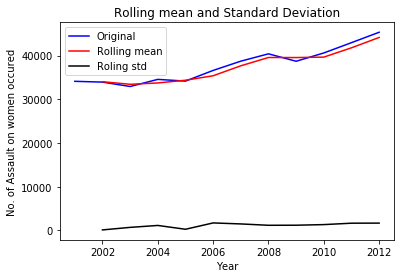

In [8]:
orig = plt.plot(indexedDataset, color ='blue', label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling mean')
std = plt.plot(rolstd, color='black', label='Roling std')
plt.legend(loc='best')
plt.xlabel("Year")
plt.ylabel("No. of Assault on women occured")
plt.title('Rolling mean and Standard Deviation')
plt.show(block=False)



In [9]:
#from the above graph you can see that the std and mean is not constant, it keeps on changing
#dickey fuller test
from statsmodels.tsa.stattools import adfuller
print ('Results of dickey-fuller test:')
dftest = adfuller(indexedDataset['Assault on women with intent to outrage her modesty'],autolag='AIC')
dfoutput = pd.Series(dftest[0:4],index=['Test statstic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key]= value
    
print(dfoutput)

Results of dickey-fuller test:
Test statstic                  0.000000
p-value                        0.958532
#Lags Used                     7.000000
Number of Observations Used    4.000000
Critical Value (1%)           -7.355441
Critical Value (5%)           -4.474365
Critical Value (10%)          -3.126933
dtype: float64


Text(0,0.5,'No. of Assault on women occured')

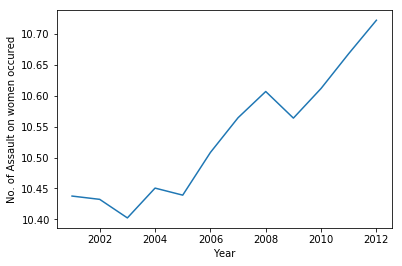

In [10]:
#as you can see the value of p is 0.9 ....but the null hypothesis should be as less as possible ...must be around 0.5
#hence we cannot reject the null hypothesis ...this shows that the data is not stationary 
indexedDataset_logScale = np.log(indexedDataset) #estimating the trend by taking log of the data that is stored in indexdataset
plt.plot(indexedDataset_logScale) #since log of the data is done the y axis values changes accordingly bt the trend remains the same
plt.xlabel("Year")
plt.ylabel("No. of Assault on women occured")

Text(0,0.5,'No. of Assault on women occured')

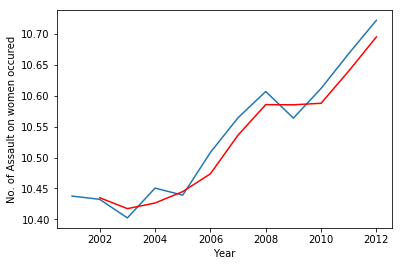

In [11]:
#calculating the mean and std of the log value
movingAverage = indexedDataset_logScale.rolling(window=2).mean()
movingSTD=indexedDataset_logScale.rolling(window=2).std()
plt.plot(indexedDataset_logScale)
plt.plot(movingAverage,color='red') 
plt.xlabel("Year")
plt.ylabel("No. of Assault on women occured")
#over here as well the data is not stationary the mean keeps changing according to the time

In [12]:
#finding the difference of the two types
#the data can be made stationary by diff ways such as taking log ,squaring, cube root etc
datasetLogScaleMinusMovingAverage = indexedDataset_logScale - movingAverage
datasetLogScaleMinusMovingAverage

datasetLogScaleMinusMovingAverage.dropna(inplace=True)
datasetLogScaleMinusMovingAverage

,Assault on women with intent to outrage her modesty
Year,
2002,-0.002659
2003,-0.015013
2004,0.024121
2005,-0.005703
2006,0.034509
2007,0.028103
2008,0.021217
2009,-0.021514
2010,0.023982


In [13]:
# the code for a  DCF 
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    movingAverage = timeseries.rolling(window=2).mean()
    movingSTD = timeseries.rolling(window=2).std()
    
    orig = plt.plot(timeseries, color ='blue', label='Original')
    mean = plt.plot(movingAverage, color='red', label='Rolling mean')
    std = plt.plot(movingSTD, color='black', label='Roling std')
    plt.legend(loc='best')
    plt.title('Rolling mean and Standard Deviation')
    plt.xlabel("Year")
    plt.ylabel("No. of Assault on women occured")
    plt.show(block=False)
 
    
    print ('Results of dickey-fuller test:')
    dftest = adfuller(timeseries['Assault on women with intent to outrage her modesty'],autolag='AIC')
    dfoutput = pd.Series(dftest[0:4],index=['Test statstic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key]= value
    print(dfoutput)

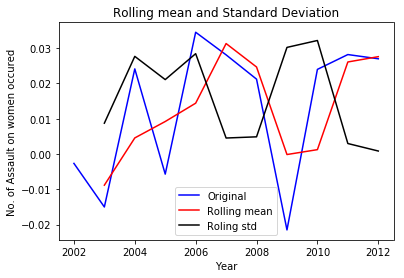

Results of dickey-fuller test:
Test statstic                 -2.054834
p-value                        0.263059
#Lags Used                     2.000000
Number of Observations Used    8.000000
Critical Value (1%)           -4.665186
Critical Value (5%)           -3.367187
Critical Value (10%)          -2.802961
dtype: float64


In [14]:
test_stationarity(datasetLogScaleMinusMovingAverage)

Text(0,0.5,'No. of Assault on women occured')

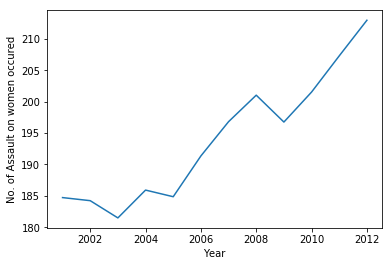

In [15]:
indexedDataset_sqScale = np.sqrt(indexedDataset) #estimating the trend by taking log of the data that is stored in indexdataset
plt.plot(indexedDataset_sqScale)
plt.xlabel("Year")
plt.ylabel("No. of Assault on women occured")

Text(0,0.5,'No. of Assault on women occured')

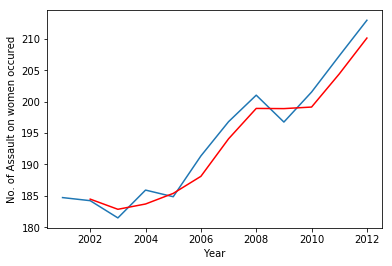

In [16]:
movingAveragesq = indexedDataset_sqScale.rolling(window=2).mean()
movingSTDsq = indexedDataset_sqScale.rolling(window=2).std()
plt.plot(indexedDataset_sqScale)
plt.plot(movingAveragesq,color='red') 
plt.xlabel("Year")
plt.ylabel("No. of Assault on women occured")

In [17]:
datasetsqScaleMinusMovingAverage = indexedDataset_sqScale - movingAveragesq
datasetsqScaleMinusMovingAverage

datasetsqScaleMinusMovingAverage.dropna(inplace=True)
datasetsqScaleMinusMovingAverage

,Assault on women with intent to outrage her modesty
Year,
2002,-0.245282
2003,-1.372607
2004,2.215490
2005,-0.528606
2006,3.245437
2007,2.726931
2008,2.110148
2009,-2.139368
2010,2.387781


Text(0,0.5,'No. of Assault on women occured')

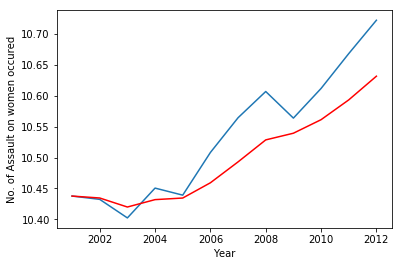

In [18]:
exponentialDecayWeightedAverage = indexedDataset_logScale.ewm(halflife= 2,min_periods=0,adjust=True).mean()
plt.plot(indexedDataset_logScale)
plt.plot(exponentialDecayWeightedAverage,color='red')
plt.xlabel("Year")
plt.ylabel("No. of Assault on women occured")

In [19]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    movingAveragesq = timeseries.rolling(window=2).mean()
    movingSTDsq = timeseries.rolling(window=2).std()
    
    orig = plt.plot(timeseries, color ='blue', label='Original')
    mean = plt.plot(movingAveragesq, color='red', label='Rolling mean')
    std = plt.plot(movingSTDsq, color='black', label='Roling std')
    plt.legend(loc='best')
    plt.title('Rolling mean and Standard Deviation')
    plt.show(block=False)
    
    print ('Results of dickey-fuller test:')
    dftest = adfuller(timeseries['Assault on women with intent to outrage her modesty'],autolag='AIC')
    dfoutput = pd.Series(dftest[0:4],index=['Test statstic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key]= value
    print(dfoutput)

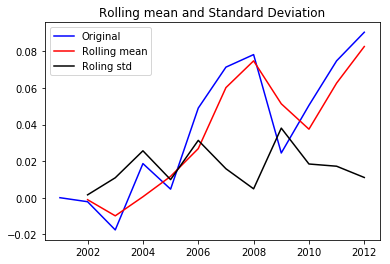

Results of dickey-fuller test:
Test statstic                 -0.000000
p-value                        0.958532
#Lags Used                     7.000000
Number of Observations Used    4.000000
Critical Value (1%)           -7.355441
Critical Value (5%)           -4.474365
Critical Value (10%)          -3.126933
dtype: float64


In [20]:
datasetLogScaleMinusMovingExponentialDecayAverage = indexedDataset_logScale - exponentialDecayWeightedAverage
test_stationarity(datasetLogScaleMinusMovingExponentialDecayAverage)

Text(0,0.5,'No. of Assault on women occured')

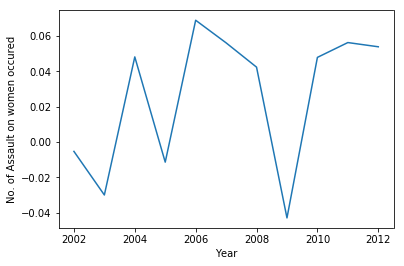

In [21]:
datasetLogDiffShifting = indexedDataset_logScale- indexedDataset_logScale.shift()
plt.plot(datasetLogDiffShifting)
plt.xlabel("Year")
plt.ylabel("No. of Assault on women occured")

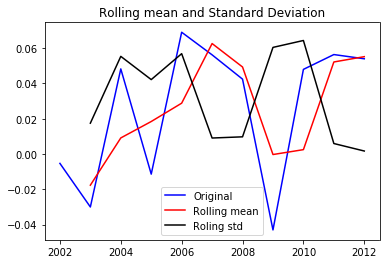

Results of dickey-fuller test:
Test statstic                 -0.000000
p-value                        0.958532
#Lags Used                     6.000000
Number of Observations Used    4.000000
Critical Value (1%)           -7.355441
Critical Value (5%)           -4.474365
Critical Value (10%)          -3.126933
dtype: float64


In [22]:
datasetLogDiffShifting.dropna(inplace=True)
test_stationarity(datasetLogDiffShifting)

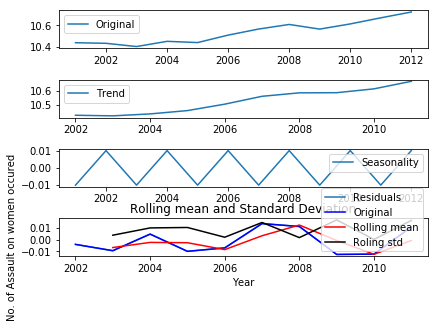

Results of dickey-fuller test:
Test statstic                 -0.000000
p-value                        0.958532
#Lags Used                     5.000000
Number of Observations Used    4.000000
Critical Value (1%)           -7.355441
Critical Value (5%)           -4.474365
Critical Value (10%)          -3.126933
dtype: float64


In [23]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition =seasonal_decompose(indexedDataset_logScale, freq=2)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(indexedDataset_logScale , label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc ='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
plt.xlabel("Year")
plt.ylabel("No. of Assault on women occured")
decomposedLogData = residual
decomposedLogData.dropna(inplace=True)
test_stationarity(decomposedLogData)


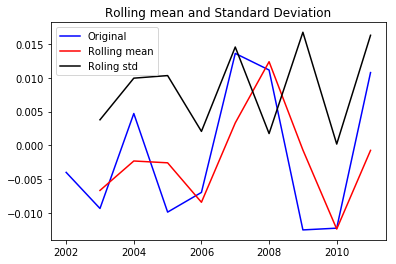

Results of dickey-fuller test:
Test statstic                 -0.000000
p-value                        0.958532
#Lags Used                     5.000000
Number of Observations Used    4.000000
Critical Value (1%)           -7.355441
Critical Value (5%)           -4.474365
Critical Value (10%)          -3.126933
dtype: float64


In [24]:
decomposedLogData = residual
decomposedLogData.dropna(inplace=True)
test_stationarity(decomposedLogData)


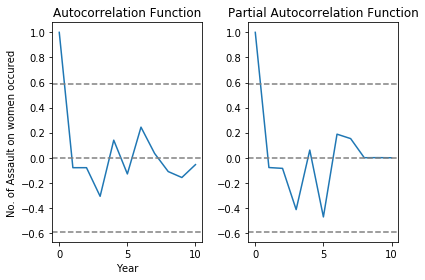

In [25]:
from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(datasetLogDiffShifting, nlags=10)
lag_pacf = pacf(datasetLogDiffShifting, nlags =10, method='ols')

#plotting acf:
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')
plt.xlabel("Year")
plt.ylabel("No. of Assault on women occured")
plt.title('Autocorrelation Function')

#plot PACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()


Plotting AR model


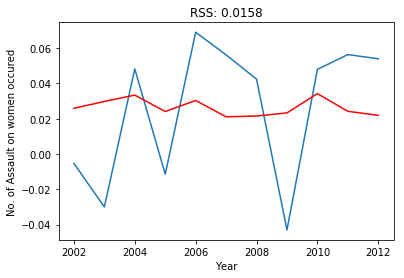

In [26]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(indexedDataset_logScale, order=(0,1,1)) #here the order includes value from the acf and pacf  ie p and q are the first downfall of the graph ie 1 and the midde value is the difference 
#the RSS value must be as low as possible
results_AR= model.fit(disp=-1)
plt.plot(datasetLogDiffShifting)
plt.plot(results_AR.fittedvalues, color='red')
plt.xlabel("Year")
plt.ylabel("No. of Assault on women occured")
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-datasetLogDiffShifting["Assault on women with intent to outrage her modesty"])**2))
print('Plotting AR model')
warnings.filterwarnings('ignore')


Plotting AR model


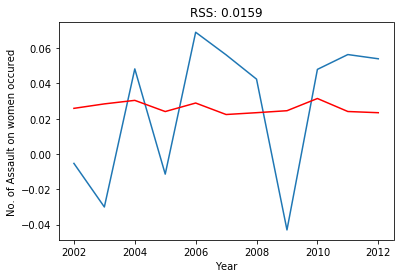

In [32]:
#MA Model
warnings.filterwarnings('ignore')
model = ARIMA(indexedDataset_logScale, order= (1,1,0))
results_MA = model.fit(disp=-1)
plt.plot(datasetLogDiffShifting)
plt.plot(results_MA.fittedvalues, color ='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues - datasetLogDiffShifting["Assault on women with intent to outrage her modesty"])**2))
plt.xlabel("Year")
plt.ylabel("No. of Assault on women occured")
print('Plotting AR model')


Text(0,0.5,'No. of KidnaAssault on women occured')

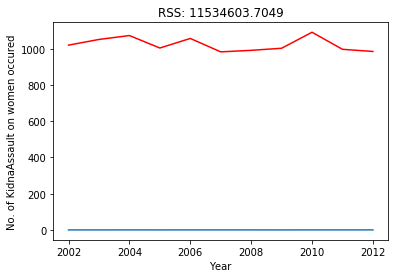

In [58]:
warnings.filterwarnings('ignore')
model = ARIMA(indexedDataset, order = (1,1,0))
results_ARIMA =  model.fit(disp=-1)
plt.plot(datasetLogDiffShifting)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues - datasetLogDiffShifting['Assault on women with intent to outrage her modesty'])**2))
plt.xlabel("Year")
plt.ylabel("No. of KidnaAssault on women occured")



In [36]:
predictions_ARIMA_diff= pd.Series(results_ARIMA.fittedvalues, copy=True)
print(predictions_ARIMA_diff.head())

Year
2002    1020.162971
2003    1051.564408
2004    1073.079709
2005    1004.272574
2006    1057.080481
dtype: float64


In [37]:
#converting it to cumulative sum
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum)

Year
2002     1020.162971
2003     2071.727379
2004     3144.807087
2005     4149.079661
2006     5206.160143
2007     6189.152699
2008     7180.641576
2009     8183.580881
2010     9274.908075
2011    10272.017596
2012    11257.284552
dtype: float64


In [38]:
predictions_ARIMA_log = pd.Series(indexedDataset_logScale['Assault on women with intent to outrage her modesty'].iloc[0], index= indexedDataset_logScale.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

Year
2001      10.437756
2002    1030.600727
2003    2082.165135
2004    3155.244843
2005    4159.517418
dtype: float64

Text(0,0.5,'No. of Assault on women occured')

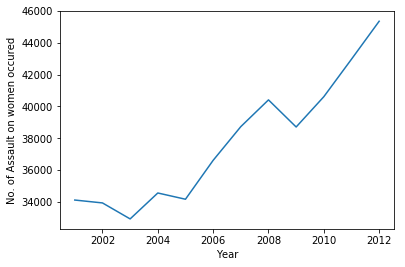

In [39]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(indexedDataset)
plt.plot(predictions_ARIMA)
plt.xlabel("Year")
plt.ylabel("No. of Assault on women occured")

#orange line is the model that we have fitted 

In [40]:
 #before predicitng check the no. of rows
indexedDataset_logScale

,Assault on women with intent to outrage her modesty
Year,
2001,10.437756
2002,10.432438
2003,10.402413
2004,10.450655
2005,10.439250
2006,10.508268
2007,10.564473
2008,10.606907
2009,10.563879


Text(0,0.5,'No. of Assault on women occured')

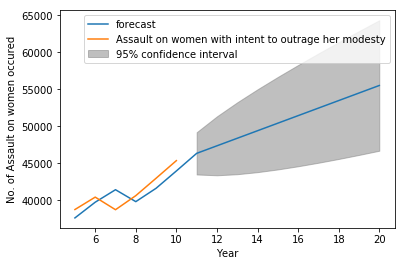

In [41]:
results_ARIMA.plot_predict(6,21)
plt.xlabel("Year")
plt.ylabel("No. of Assault on women occured")

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
ds = pd.read_csv("2013.csv")
ds

,Crimes,Rate
0,Rape,33707
1,Kidnapping and Abduction,51881
2,Dowry Deaths,8083
3,Assault on women with intent to outrage her mo...,70739
4,Insult to modesty of Women,12589
5,Cruelty by Husband or his Relatives,118866
6,Importation of Girls,31
